In [11]:
from platform import python_version
python_version()

'3.6.13'

In [12]:
import os
os.getcwd()

'c:\\Users\\ankit19.gupta\\Desktop\\Self Projects\\3. Stock Prediction using LSTM Recurrent Neural Network'

In [13]:
## We do Stock prediction for a particular company
## We'll use Recurrent Neural Network with LSTM(Long Short Term Memory)
## Recurrent Neural Network algorithm work on sequential data. 
## Sequential data means data which are in sequence. For example, music generation, text generation by chatbots
## Because it uses memory to store previous data so it uses for sequential data
## Here we try to implement recurrent neural network by predicting stock prices of Gooogle company wherein we take past 
## 5 years of data and then we try to predict for next months data for stock prices

In [14]:
## Here we use Google_Stock_Price_Train dataset and we predict stock prices for next one month i.e. from 3 jan 2017 to 31 jan 2017 (1 and 2 jan might be holiday)
## for "Open" feature value in the dataset 
## in test data, we predict values for open feature from 3 jan 2017 to 31 jan 2017 and then see the difference from given values

## Recurrent Neural Network

### Part 1 - Data Preprocessing

In [15]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [17]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [18]:
training_set = dataset_train.iloc[:, 1:2].values

In [19]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [22]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [23]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [24]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [25]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [26]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [27]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Part 2 - Building the RNN

In [35]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

In [36]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 74ms/step - loss: 0.0389
Epoch 2/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

### Part 3 - Making the predictions and visualising the results

In [38]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [39]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [40]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [41]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [43]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [47]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [48]:
inputs = inputs.reshape(-1,1)

In [49]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [50]:
inputs = sc.transform(inputs)

In [51]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [52]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [55]:
X_test

[array([0.9299055 , 0.93113327, 0.92750577, 0.94415507, 0.93876032,
        0.93403527, 0.93483518, 0.9313937 , 0.94636878, 0.96569685,
        0.97510976, 0.95966962, 0.97808617, 1.        , 0.98076494,
        0.97083116, 0.98450406, 0.96054394, 0.9371419 , 0.92841729,
        0.90804747, 0.8771858 , 0.92153434, 0.93809063, 0.93165414,
        0.95254483, 0.88812412, 0.88637547, 0.87032145, 0.88563137,
        0.90743359, 0.91571173, 0.89941588, 0.91805566, 0.9089404 ,
        0.9024853 , 0.89456061, 0.91600938, 0.9132934 , 0.88979835,
        0.86589404, 0.89030062, 0.90335962, 0.89642086, 0.91777662,
        0.93176576, 0.94114145, 0.95762334, 0.96413424, 0.96402262,
        0.96971501, 0.95077759, 0.96294367, 0.96123223, 0.95475854,
        0.95204256, 0.95163331, 0.95725128, 0.93796041, 0.93688146]),
 array([0.93113327, 0.92750577, 0.94415507, 0.93876032, 0.93403527,
        0.93483518, 0.9313937 , 0.94636878, 0.96569685, 0.97510976,
        0.95966962, 0.97808617, 1.        , 0.

In [56]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [57]:
predicted_stock_price = regressor.predict(X_test)

In [58]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [60]:
predicted_stock_price

array([[795.27606],
       [793.03864],
       [792.4029 ],
       [792.933  ],
       [795.26324],
       [799.97253],
       [805.3234 ],
       [809.0242 ],
       [810.9485 ],
       [811.6133 ],
       [811.5585 ],
       [811.0889 ],
       [810.5073 ],
       [810.39716],
       [810.8079 ],
       [813.8548 ],
       [819.3462 ],
       [826.2359 ],
       [831.6443 ],
       [831.38513]], dtype=float32)

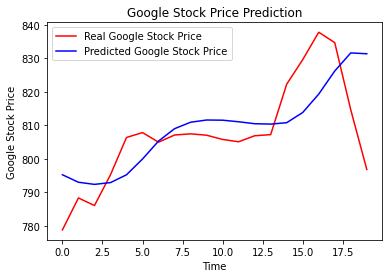

In [61]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()